In [28]:
import numpy as np
import pandas as pd
import re


In [3]:
# data = pd.read_csv('../Call_Transcripts_Seeking_Alpha/CallTranscriptsFITB.txt', sep=" ", header=None)
file = open('/Users/akshitachawdhary/Desktop/DA_Davidson/Capstone_NLP_DIWD/Call_Transcripts_Seeking_Alpha/CallTranscriptsFITB.txt','r', encoding='cp1252') 
fullCallTranscript = file.readlines()   #.split('Question-and-Answer Session')
len(fullCallTranscript)
# text = (file.readlines())

1869

In [4]:
q_and_a_index = fullCallTranscript.index("Question-and-Answer Session\n")

In [5]:
# Divide the transcript into initial summary and Q & A Session
q_and_a = fullCallTranscript[q_and_a_index:]
summary = fullCallTranscript[:q_and_a_index]

In [6]:
execIndex = summary.index("Executives\n")
analystIndex = summary.index("Analysts\n")
operatorIndex = summary.index("Operator\n")

In [7]:
executives = summary[execIndex + 1 : analystIndex]
print(executives)
executiveDict = {}
for e in executives:
    name, position = e.split('-')
    executiveDict[name.strip()] = position.strip()
executiveDict

['Jenn Thompson - Director, IR\n', 'Andrew Cecere - Chairman, President and CEO\n', 'Terrance Dolan - Vice Chairman and CFO\n']


{'Andrew Cecere': 'Chairman, President and CEO',
 'Jenn Thompson': 'Director, IR',
 'Terrance Dolan': 'Vice Chairman and CFO'}

In [8]:
analysts = summary[analystIndex +1: operatorIndex]
print(analysts)

analystsDict = {}
for a in analysts:
    name, company = a.split('-')
    analystsDict[name.strip()] = company.strip()
analystsDict

['John McDonald - Sanford C. Bernstein & Co., LLC\n', 'John Pancari - Evercore ISI\n', "Matthew O'Connor - Deutsche Bank\n", 'Kenneth Usdin - Jefferies & Company, Inc.\n', 'Erika Najarian - Bank of America Merrill Lynch\n', "Scott Siefers - Sandler O'Neill + Partners, L.P\n", 'Betsy Graseck - Morgan Stanley\n', 'Mike Mayo - Wells Fargo Securities\n', 'Marty Mosby - Vining Sparks\n', 'Kevin Barker - Piper Jaffray\n', 'Vivek Juneja - JPMorgan Chase & Company\n', 'Saul Martinez - UBS\n', 'Gerard Cassidy - RBC Capital Markets\n', 'Brian Klock - Keefe, Bruyette & Woods\n']


{'Betsy Graseck': 'Morgan Stanley',
 'Brian Klock': 'Keefe, Bruyette & Woods',
 'Erika Najarian': 'Bank of America Merrill Lynch',
 'Gerard Cassidy': 'RBC Capital Markets',
 'John McDonald': 'Sanford C. Bernstein & Co., LLC',
 'John Pancari': 'Evercore ISI',
 'Kenneth Usdin': 'Jefferies & Company, Inc.',
 'Kevin Barker': 'Piper Jaffray',
 'Marty Mosby': 'Vining Sparks',
 "Matthew O'Connor": 'Deutsche Bank',
 'Mike Mayo': 'Wells Fargo Securities',
 'Saul Martinez': 'UBS',
 'Scott Siefers': "Sandler O'Neill + Partners, L.P",
 'Vivek Juneja': 'JPMorgan Chase & Company'}

In [9]:
# Get and store the answers of the executives in the executivesDictionary

# elem,next_elem in zip(li, li[1:]+[li[0]]):
for item,next_item in zip(q_and_a, q_and_a[1:]+[q_and_a[0]]):
#     print(item)
    if item.strip() in executiveDict.keys():
        val = executiveDict[item.strip()]
        executiveDict[item.strip()] = val + ' ' + next_item
#         print(item, next_item)
        
print(executiveDict['Andrew Cecere'])

Chairman, President and CEO I'd ask Terry to start, then I'll jump in.
 And John, Andy. As we look at next year, I would highlight a couple of things. As we've talked about, we've lapped the payments to the merchant revenue issue and you saw that that's growing 4%. We continue to expect that to accelerate as we go into next quarter and next year.
 Yes, it is.
 And John, importantly, we're not assuming that surcharge goes away as we think about positive operating leverage in 2019.
 Sure.
 Good morning.
 Hey Matt.
 Matt, this is Andy. We were talking about that, the 0.9% accelerating to a higher number on a linked-quarter basis.
 Thanks Matt.
 Hey Ken.
 And Terry our deposit beta assumptions have been consistent with what's happening.
 Thanks Ken.
 Good morning Erika.
 You start there second question.
 And then Erika on your question on private equity you're now in bank or non-bank competition, I would say that is evident in some of the wholesale categories. I think it's probably most pr

In [10]:
# Get and store the answers of the analysts in the analystsDictionary

# elem,next_elem in zip(li, li[1:]+[li[0]]):
for item,next_item in zip(q_and_a, q_and_a[1:]+[q_and_a[0]]):
#     print(item)
    if item.strip() in analystsDict.keys():
        val = analystsDict[item.strip()]
        analystsDict[item.strip()] = val + ' ' + next_item
#         print(item, next_item)
        
print(analystsDict.keys())
print(analystsDict['John McDonald'])

dict_keys(['John McDonald', 'John Pancari', "Matthew O'Connor", 'Kenneth Usdin', 'Erika Najarian', 'Scott Siefers', 'Betsy Graseck', 'Mike Mayo', 'Marty Mosby', 'Kevin Barker', 'Vivek Juneja', 'Saul Martinez', 'Gerard Cassidy', 'Brian Klock'])
Sanford C. Bernstein & Co., LLC Hi good morning guys. Wanted to ask a little bit about the positive operating leverage, you had a nice print on positive operating leverage this quarter, looks like about 80 basis points. Just wondering how much help you got on the expense line this quarter from some of the accrual reversals and any other one-timers that you mentioned?
 Okay. And Andy just a quick follow-up. Is the 1% to 1.5% still kind of a good target as you sit here now and look out to 2019 for the operating leverage that you're going to shoot for?
 Okay. And then one quick follow-up Terry. The FDI insurance fees lower that you mentioned, what was the driver of that? And you still have a stepdown coming from the end of the surcharge later in the

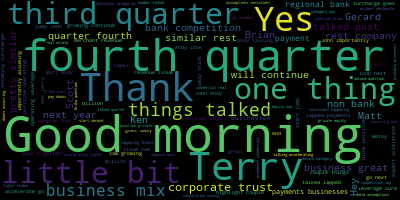

In [13]:
import wordcloud
wordcloud = wordcloud.WordCloud() # Create a wordcloud object
wordcloud.generate(executiveDict['Andrew Cecere'])   # Generate a wordcloud
wordcloud.to_image()              # Visualize the word cloud

In [12]:
import os
file_list = os.listdir("../Call_Transcripts_Seeking_Alpha/")


In [16]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [17]:
#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)



In [22]:
x=stemSentence(text)
print(len(x))

227042


In [24]:
from pycorenlp import StanfordCoreNLP


In [27]:
from stanfordcorenlp import StanfordCoreNLP

nlp = StanfordCoreNLP('/Users/name/stanford-corenlp-full-2018-10-05')

sentence = 'Guangdong University of Foreign Studies is located in Guangzhou.'
print('Tokenize:', nlp.word_tokenize(sentence))
print('Part of Speech:', nlp.pos_tag(sentence))
print('Named Entities:', nlp.ner(sentence))
print('Constituency Parsing:', nlp.parse(sentence))
print('Dependency Parsing:', nlp.dependency_parse(sentence))

nlp.close() # Do not forget to close! The backend server will consume a lot memory.

OSError: /Users/name/stanford-corenlp-full-2018-10-05 is not a directory.

In [14]:
# Pre processing

In [15]:
# Coverting text to lowercase

In [25]:
executiveDict['Andrew Cecere'] = executiveDict['Andrew Cecere'].lower()
print(executiveDict['Andrew Cecere'])

In [18]:
# Remove numbers

In [27]:
data = executiveDict['Andrew Cecere'] 
#print(data)

In [29]:
# split into sentences

In [28]:
from nltk import sent_tokenize
sentences = sent_tokenize(data)
print(sentences[0])

chairman, president and ceo i'd ask terry to start, then i'll jump in.


In [30]:
# split into words

In [31]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(data)
print(tokens[:100])

['chairman', ',', 'president', 'and', 'ceo', 'i', "'d", 'ask', 'terry', 'to', 'start', ',', 'then', 'i', "'ll", 'jump', 'in', '.', 'and', 'john', ',', 'andy', '.', 'as', 'we', 'look', 'at', 'next', 'year', ',', 'i', 'would', 'highlight', 'a', 'couple', 'of', 'things', '.', 'as', 'we', "'ve", 'talked', 'about', ',', 'we', "'ve", 'lapped', 'the', 'payments', 'to', 'the', 'merchant', 'revenue', 'issue', 'and', 'you', 'saw', 'that', 'that', "'s", 'growing', '4', '%', '.', 'we', 'continue', 'to', 'expect', 'that', 'to', 'accelerate', 'as', 'we', 'go', 'into', 'next', 'quarter', 'and', 'next', 'year', '.', 'yes', ',', 'it', 'is', '.', 'and', 'john', ',', 'importantly', ',', 'we', "'re", 'not', 'assuming', 'that', 'surcharge', 'goes', 'away', 'as']


In [42]:
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
print(stripped[:100])

['chairman', '', 'president', 'and', 'ceo', 'i', 'd', 'ask', 'terry', 'to', 'start', '', 'then', 'i', 'll', 'jump', 'in', '', 'and', 'john', '', 'andy', '', 'as', 'we', 'look', 'at', 'next', 'year', '', 'i', 'would', 'highlight', 'a', 'couple', 'of', 'things', '', 'as', 'we', 've', 'talked', 'about', '', 'we', 've', 'lapped', 'the', 'payments', 'to', 'the', 'merchant', 'revenue', 'issue', 'and', 'you', 'saw', 'that', 'that', 's', 'growing', '4', '', '', 'we', 'continue', 'to', 'expect', 'that', 'to', 'accelerate', 'as', 'we', 'go', 'into', 'next', 'quarter', 'and', 'next', 'year', '', 'yes', '', 'it', 'is', '', 'and', 'john', '', 'importantly', '', 'we', 're', 'not', 'assuming', 'that', 'surcharge', 'goes', 'away', 'as']


In [32]:
# remove all tokens that are not alphabetic

In [43]:
words = [word for word in stripped if word.isalpha()]
print(words[:100])

['chairman', 'president', 'and', 'ceo', 'i', 'd', 'ask', 'terry', 'to', 'start', 'then', 'i', 'll', 'jump', 'in', 'and', 'john', 'andy', 'as', 'we', 'look', 'at', 'next', 'year', 'i', 'would', 'highlight', 'a', 'couple', 'of', 'things', 'as', 'we', 've', 'talked', 'about', 'we', 've', 'lapped', 'the', 'payments', 'to', 'the', 'merchant', 'revenue', 'issue', 'and', 'you', 'saw', 'that', 'that', 's', 'growing', 'we', 'continue', 'to', 'expect', 'that', 'to', 'accelerate', 'as', 'we', 'go', 'into', 'next', 'quarter', 'and', 'next', 'year', 'yes', 'it', 'is', 'and', 'john', 'importantly', 'we', 're', 'not', 'assuming', 'that', 'surcharge', 'goes', 'away', 'as', 'we', 'think', 'about', 'positive', 'operating', 'leverage', 'in', 'sure', 'good', 'morning', 'hey', 'matt', 'matt', 'this', 'is', 'andy']


In [34]:
#filter out stop words

In [44]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['chairman', 'president', 'ceo', 'ask', 'terry', 'start', 'jump', 'john', 'andy', 'look', 'next', 'year', 'would', 'highlight', 'couple', 'things', 'talked', 'lapped', 'payments', 'merchant', 'revenue', 'issue', 'saw', 'growing', 'continue', 'expect', 'accelerate', 'go', 'next', 'quarter', 'next', 'year', 'yes', 'john', 'importantly', 'assuming', 'surcharge', 'goes', 'away', 'think', 'positive', 'operating', 'leverage', 'sure', 'good', 'morning', 'hey', 'matt', 'matt', 'andy', 'talking', 'accelerating', 'higher', 'number', 'linkedquarter', 'basis', 'thanks', 'matt', 'hey', 'ken', 'terry', 'deposit', 'beta', 'assumptions', 'consistent', 'happening', 'thanks', 'ken', 'good', 'morning', 'erika', 'start', 'second', 'question', 'erika', 'question', 'private', 'equity', 'bank', 'nonbank', 'competition', 'would', 'say', 'evident', 'wholesale', 'categories', 'think', 'probably', 'prominent', 'commercial', 'real', 'estate', 'category', 'pay', 'downs', 'occurring', 'nonbank', 'competition', 'com

In [38]:
#stemming the words

In [45]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]
print(stemmed[:100])

['chairman', 'presid', 'ceo', 'ask', 'terri', 'start', 'jump', 'john', 'andi', 'look', 'next', 'year', 'would', 'highlight', 'coupl', 'thing', 'talk', 'lap', 'payment', 'merchant', 'revenu', 'issu', 'saw', 'grow', 'continu', 'expect', 'acceler', 'go', 'next', 'quarter', 'next', 'year', 'ye', 'john', 'importantli', 'assum', 'surcharg', 'goe', 'away', 'think', 'posit', 'oper', 'leverag', 'sure', 'good', 'morn', 'hey', 'matt', 'matt', 'andi', 'talk', 'acceler', 'higher', 'number', 'linkedquart', 'basi', 'thank', 'matt', 'hey', 'ken', 'terri', 'deposit', 'beta', 'assumpt', 'consist', 'happen', 'thank', 'ken', 'good', 'morn', 'erika', 'start', 'second', 'question', 'erika', 'question', 'privat', 'equiti', 'bank', 'nonbank', 'competit', 'would', 'say', 'evid', 'wholesal', 'categori', 'think', 'probabl', 'promin', 'commerci', 'real', 'estat', 'categori', 'pay', 'down', 'occur', 'nonbank', 'competit', 'come', 'marketplac']
